In [108]:
import numpy as np
np.random.seed(100) # Set the seed for reproducibility 

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["font.family"] = "Product Sans"
rcParams["font.serif"] = "Times New Roman"
%matplotlib inline
rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{bm} \usepackage{physics} \usepackage{type1ec}'
#rcParams['text.usetex'] = True
%config InlineBackend.figure_format = 'retina' # For high quality figures

# $\chi^2$ (chi-squared) minimization

## Week 4, Intro-to-Astro 2020
### Written by Joey Murphy, June 2020
### Adapted from lecture notes by Ian Czekala

## Statistics and astronomy
* Astronomers rely heavily on statistical techniques for data analysis
* *But* physics/astronomy curricula usually neglect foundational courses in statistics and probability theory
* Highly recommend taking courses in these areas if available at your school!
* List of useful references at the end

## $\chi^2$ minimization
* In the *Methods* sections of any astronomy/astrophysics paper, there is almost always some model being fit to noisy data (physical or simulated)
* After reading a couple of papers, you'll likely run into the phrase "the best-fitting model..." 
* Sometimes authors report something like "the best-fitting model has $\chi^2 = \:$ xyz" or say that the *minimum* $\chi^2$ value is xyz (where $\chi$ is the Greek letter "chi")

## What is $\chi^2$ and why is it being minimized?

What does "best-fitting" actually mean? "Best" as measured how?

* First we need to talk about
    * Measurement errors (uncertainties)
    * Probability density functions
    * Likelihood

## Measurement errors (uncertainties)

* Any measurement (whether it's your height, the voltage across a resistor, or the position of a star) has inherent error
* The size and source of this error is related to how the measurement was made 
    * *Question:* What's one source of error you might encounter when measuring your height?
    * *Question:* What's one source of error you might encounter when measuring the poisition of a star on the sky? (like Gaia)

## Measurement errors (uncertainties)
* Let's consider the task of measuring the length (in cm!) of a house key using a ruler
* The ruler has tick marks for milimeters and centimeters
    
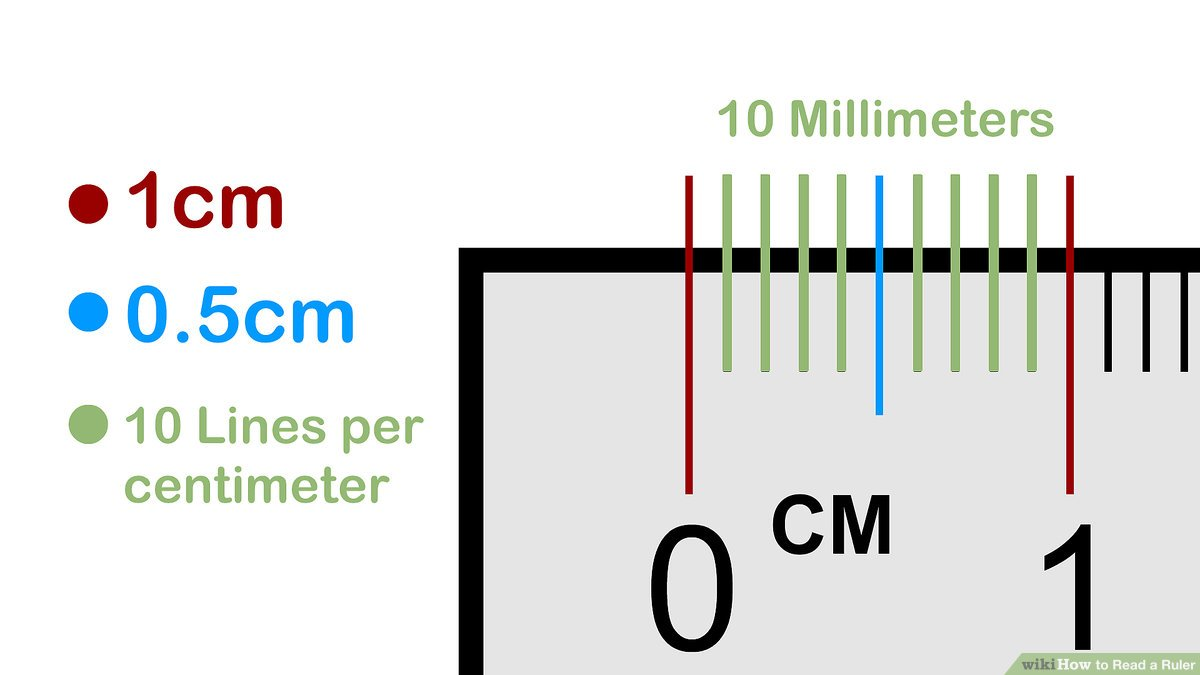

## Measurement errors (uncertainties)
* For this example, let's assume the error on each measurement is about 0.05 cm (i.e. half of the width between the finest tick marks) 
* You take a handful of measurements of the key and get a collection of values that are similar, but not exactly the same 
* Why different values?
    * Maybe the key isn't always lined up at the edge of the ruler
    * Maybe you're looking at the ruler from a different angle
    * etc...
    
**What is the best-fitting value for the true length of the key, given our measurements?**

## Measurement errors (uncertainties)
* Let's "take" some measurements and then make a plot to visualize their scatter

In [3]:
#import numpy as np
#import matplotlib.pyplot as plt

# Generate the measurement data
mu_key    = 6.0  # cm. The *actual* length of the key (unknown to us)
sigma_key = 0.05 # cm. Uncertainty on each measurement, based on the tick marks on our ruler
n_measure = 100  # Take 100 measurements
X = np.random.normal(mu_key, sigma_key, n_measure) # Generate the "measurements"

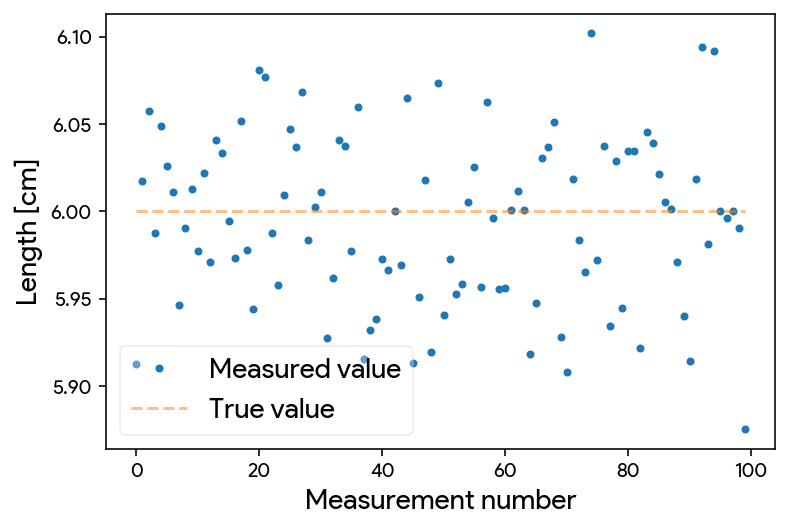

In [4]:
# Plot the data
plt.plot(np.arange(n_measure), X, '.', label='Measured value')
plt.plot(np.arange(n_measure), mu_key * np.ones(n_measure), '--', alpha=0.5, label='True value')

plt.xlabel('Measurement number', fontsize=14)
plt.ylabel('Length [cm]', fontsize=14)
plt.legend(fontsize=14, framealpha=0.3)

plt.show()

Let's look back at how the "measurements" were generated in the previous plot.

Here's the line we used to create the data:

In [5]:
X = np.random.normal(mu_key, sigma_key, n_measure) # Generate the "measurements"

The call to np.random.normal "draws" n_measure values randomly from a *Gaussian* (i.e. "Normal") probability distribution, centered at value mu_key and of width sigma_key.

In probability theory, this is written as

\begin{align}
X & \sim \mathcal{N}(\mu_\mathrm{key}, \sigma^2_\mathrm{key})
\end{align}

where the tilde ($\sim$) says that the data, $X$, is *drawn from* a Normal distribution ($\mathcal{N}$) with *mean* $\mu_\mathrm{key}$ and *standard deviation* $\sigma_\mathrm{key}$. 

(n.b. $\sigma^2$ is referred to as the *variance*, and can sometimes be more convenient to use than $\sigma$ itself.)

Here we are *assuming* our measurements to be *Gaussian random variables*. In many cases, this is usually a reasonable assumption. 

## Probability density functions
* How do we describe a probability distribution with a mathematical function?
* A *probability density function* (sometimes abbreviated as pdf) describes the relative likelihood of observing data at different locations in the domain
* For $\mathcal{N}(\mu, \sigma^2)$, the mathematical form of the probability density function is

\begin{align}
p(x | \mu, \sigma^2) & = \frac{1}{\sigma \sqrt{2 \pi}} \mathrm{exp}\Big[-\frac{1}{2} \big(\frac{x-\mu}{\sigma}\big)^2  \Big]
\end{align}

The left-hand side of the equation reads: the likelihood of observing the datum, $x$, *given* (vertical bar) mean, $\mu$, and variance $\sigma^2$. i.e. if we *know* the mean and variance of the Normal distribution that describes the data, we can calculate the relatively probability of observing $x$ using the righ-hand side of the equation.

## Probability density functions

Let's make a plot of the probability density function for the distribution that describes our measurements of the house key. On the same plot, let's show the histogram of the data we actually observered.

In [6]:
def gaussian_pdf(x, mu=0, sigma=1):
    '''
    A gaussian pdf. Units of 1/x.
    
    Args
    ----------
    x (float): Location to evaluate the gaussian pdf.
    mu (float): Optional, default = 0. Mean of the gaussian.
    sigma (float): Optional, default = 1. Standard deviation.
    
    Returns
    ----------
    float: N(mu, sigma) evaluated at x.
    '''
    assert sigma > 0, "Standard deviation must be positive."
    return (1 / np.sqrt(2 * np.pi) / sigma) * np.exp(-0.5 * ((x - mu)/sigma)**2)

In [7]:
?np.linspace

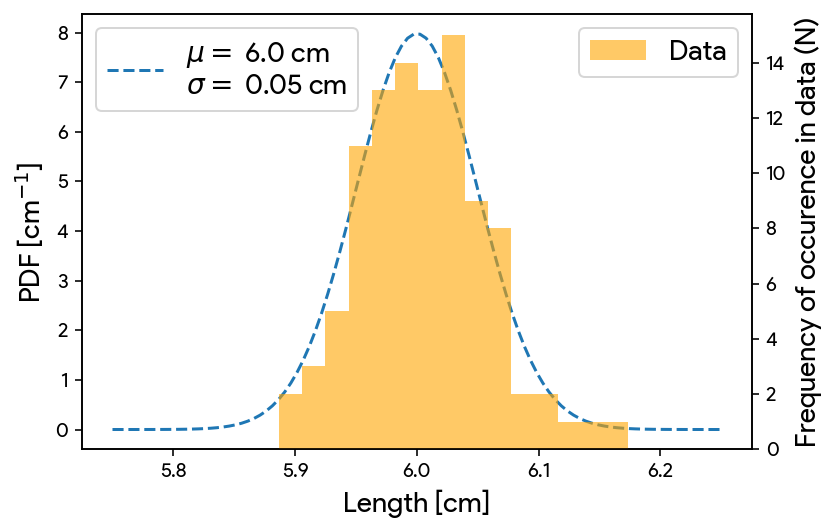

In [8]:
X = np.random.normal(mu_key, sigma_key, n_measure)
x = np.linspace(5.75, 6.25, 100) #(start, stop, number)
pdf = gaussian_pdf(x, mu = mu_key, sigma = sigma_key)

fig, ax = plt.subplots()
pdf_label = '$\mu = \:$' + f'{mu_key} cm' + '\n' + '$\sigma = \:$' + f'{sigma_key} cm'
pdf_line = ax.plot(x, pdf, '--', label=pdf_label)
ax1 = ax.twinx() # Different y-axes but same x-axis for pdf plot and histogram
hist_label = 'Data'
hist = ax1.hist(X, label=hist_label, color='orange', alpha=0.6, bins=15)

ax.set_xlabel('Length [cm]', fontsize=14)
ax.set_ylabel('PDF [cm$^{-1}$]', fontsize=14)
ax1.set_ylabel('Frequency of occurence in data (N)', fontsize=14)
ax.legend(fontsize=14, loc='upper left')
ax1.legend(fontsize=14, loc='upper right')
plt.show()

## Likelihood

* So now that we have a probabilistic distribution, $\mathcal{N}(\mu_\mathrm{key}, \sigma^2_\mathrm{key})$, that we think describes the data, $X$, we might ask ourselves:
    * What is the *likelihood* (i.e. probability) of observing our *collection* of measurements, given  $\mu_\mathrm{key}$ and $\sigma^2_\mathrm{key}$?

If the measurements are *independent* (i.e. One measurement has no impact on the outcome of another. Think flipping a coin) then the likelihood of the data is 

\begin{align}
\mathcal{L} = \Pi_i^N p(x_i | \mu_\mathrm{key}, \sigma^2_\mathrm{key})
\end{align}

where $\Pi$ means product. i.e. Multiply together all of the individual probabilities for each measurement.

## Likelihood

Often, it's convenient to work with the natural logarithm of the likelihood, since the logarithm of a product is the sum of the logarithms of each factor. The "log-likelihood" is then

\begin{align}
\mathrm{ln} \mathcal{L} & = \Sigma_i^N \mathrm{ln}\Big[ p(x_i | \mu_\mathrm{key}, \sigma^2_\mathrm{key}) \Big]
\end{align}

Plugging in for $p(x_i | \mu_\mathrm{key}, \sigma^2_\mathrm{key})$ and doing some algebra, we have

\begin{align}
\mathrm{ln} \mathcal{L} & = \Sigma_i^N \mathrm{ln}\Big[ \frac{1}{\sigma_\mathrm{key} \sqrt{2 \pi}} \mathrm{exp}\Big[-\frac{1}{2} \big(\frac{x_i-\mu_\mathrm{key}}{\sigma_\mathrm{key}}\big)^2  \Big] \Big] \\
& = \Sigma_i^N \mathrm{ln}\Big[ \frac{1}{\sigma_\mathrm{key} \sqrt{2 \pi}} \Big] + \mathrm{ln}\Big[ \mathrm{exp}\Big[-\frac{1}{2} \big(\frac{x_i-\mu_\mathrm{key}}{\sigma_\mathrm{key}}\big)^2  \Big] \Big] \\
& = \Sigma_i^N \mathrm{ln}\Big[ \frac{1}{\sigma_\mathrm{key} \sqrt{2 \pi}} \Big] + \Big[-\frac{1}{2} \big(\frac{x_i-\mu_\mathrm{key}}{\sigma_\mathrm{key}}\big)^2  \Big]
\end{align}

## Likelihood

\begin{align}
\mathrm{ln} \mathcal{L} & = \Sigma_i^N \mathrm{ln}\Big[ \frac{1}{\sigma_\mathrm{key} \sqrt{2 \pi}} \Big] + \Big[-\frac{1}{2} \big(\frac{x_i-\mu_\mathrm{key}}{\sigma_\mathrm{key}}\big)^2  \Big]
\end{align}

Notice that the first term in the sum doesn't depend on the summation index, $i$, so we can get rid of it and replace the equality with proportionality:

\begin{align}
\mathrm{ln} \mathcal{L} & \propto \Sigma_i^N \Big[-\frac{1}{2} \big(\frac{x_i-\mu_\mathrm{key}}{\sigma_\mathrm{key}}\big)^2  \Big]
\end{align}

Let's define $\chi^2 \equiv \Sigma_i^N \big(\frac{x_i - \mu_\mathrm{key}}{\sigma_\mathrm{key}}\big)^2$. Then we have 

\begin{align}
\mathrm{ln} \mathcal{L} & \propto -\frac{1}{2} \chi^2
\end{align}

$\chi^2$ is related to the log-likelihood of our data!

## $\chi^2$ minimization

Finally we've found out what $\chi^2$ is
\begin{align}
\chi^2 & \equiv \Sigma_i^N \big(\frac{x_i - \mu_\mathrm{key}}{\sigma_\mathrm{key}}\big)^2
\end{align}

and how it's related to the (log) likelihood of our data

\begin{align}
\mathrm{ln} \mathcal{L} & \propto -\frac{1}{2} \chi^2
\end{align}

after we made some assumptions about the underlying probability distribution that describes our measurements.

**What is the best-fitting value for the true length of the key, given our data?** 

We want to *maximize* the log-likelihood of observing our data with respect to $\mu_\mathrm{key}$ (since, after all, it's what we observed). This corresponds to *minimizing* the $\chi^2$ metric.

## $\chi^2$ minimization

How to find the extremum? Take the derivative and set it equal to zero!

\begin{align}
\frac{d \mathrm{ln}\mathcal{L}}{d \mu_\mathrm{key}} \Big|_{\hat{\mu}_\mathrm{key}} = \Sigma_i^N \frac{x_i - \hat{\mu}_\mathrm{key}}{\sigma_\mathrm{key}^2} = 0,
\end{align}

where $\hat{\mu}_\mathrm{key}$ is the most likely or best-fitting value for our estimate of the true length of the key, given our data. Rearranging, we have 

\begin{align}
\hat{\mu}_\mathrm{key} & = \frac{1}{N} \Sigma_i^N x_i.
\end{align}

In other words, in this special case where $\sigma^2_\mathrm{key}$ was the same for every measurement, the best-fitting value of $\mu_\mathrm{key}$ is the average of all of our measurement values!

In [64]:
X = np.random.normal(mu_key, sigma_key, n_measure)
# If we didn't do all of this analysis by hand, and just wanted to minimize chi^2 in code, what would that look like?
from scipy.optimize import minimize

def chi_squared(mu, sigma, data):
    '''
    Args
    ----------
    mu (float): Underlying mean of distribution (unknown to us).
    sigma (float): Measurement error.
    data (ndarray): Vector of observed data
    
    Returns
    ----------
    float: chi-squared value
    '''
    return np.sum(((data - mu)/sigma)**2)

mu_0 = 4.0 # cm. Our initial guess at the true length of the key, just from eye-balling it.
min_results = minimize(chi_squared, mu_0, args=(sigma_key, X)) # Minimize chi-squared with respect to mu

print(f"Best-fitting value of mu_key from chi-squared minimization = {min_results.x[0]:.3f} cm")
print(f"Average of the data = {np.average(X):.3f} cm")

Best-fitting value of mu_key from chi-squared minimization = 6.005 cm
Average of the data = 6.005 cm


In [105]:
print(f" Answer = {minimize(chi_squared, mu_0, args=(sigma_key, X)).x[0]:.5f}")

 Answer = 6.00546


## $\chi^2$ minimization

* Minimizing $\chi^2$ gave us the result we were expecting from the analysis we did by hand! 
* If you remember how we generated the synthetic data, we gave the key a true length of 6.0 cm, so our estimate is right on target

## Conclusion

What did we just do?

* We wanted to estimate the true length of a house key, given some (uncertain) measurements
* Acquired the data (which had **uniform measurement errors**)
* Assumed that the **underlying distribution** that described the data was a **Gaussian**
* Assumed that the **measurements were independent**
* Wrote down an analytic form for the (log) likelihood of the data observed
* Minimized the $\chi^2$ metric (i.e. maximimized the likelihood of the observed data) with respect to the parameter of interest ($\mu_\mathrm{key}$)

## External resources

(List originally compiled by Ian Czekala)

* *Data Analysis: A Bayesian Tutorial*, by Sivia and Skilling [(link)](https://www.amazon.com/Data-Analysis-Bayesian-Devinderjit-Sivia/dp/0198568320/ref=sr_1_1?ie=UTF8&qid=1500081454&sr=8-1&keywords=data+analysis+a+bayesian+tutorial). This is a very useful “handbook” to work through as an introduction to Bayesian data analysis. I highly recommend this as a first text if you can access it through your school's online library.

* Hogg et al. 2010: *Fitting a line*. [(link)](https://arxiv.org/abs/1008.4686) An applied example of Bayesian analysis for the simple example of line fitting. The simple title belies how dense this paper actually is... beware!

* Hogg et al. 2012: *Probability calculus* [(link)](https://arxiv.org/abs/1205.4446) Good notes about what you can and cannot do with probability calculus.

* *Doing Bayesian Data Analysis*, by Kruschke [(link)](https://sites.google.com/site/doingbayesiandataanalysis/). A nice introductory text to Bayesian Analysis (with puppies!)

* *Bayesian Data Analysis*, by Gelman et al. [(link)](http://www.stat.columbia.edu/~gelman/book/) The definitive reference book on Bayesian analysis and hierarchical Bayesian analysis. A dense but worthwhile book.